In [254]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Importing necessary libraries and loading csv files of different key factors

In [255]:



unemployment_rate = pd.read_csv('unemp_rate.csv', parse_dates=['DATE']).rename(columns={'value': 'unemployment_rate'})
GDP = pd.read_csv('GDP.csv', parse_dates=['DATE']).rename(columns={'value': 'GDP'})
housing_supply = pd.read_csv('monthly_housing_supply.csv', parse_dates=['DATE']).rename(columns={'value': 'housing_supply'})
consumer_sentiment = pd.read_csv('consumer_sentiment.csv', parse_dates=['DATE']).rename(columns={'value': 'consumer_sentiment'})
population_growth = pd.read_csv('POPTHM.csv', parse_dates=['DATE']).rename(columns={'value': 'population_growth'})
HPI = pd.read_csv('CSUSHPISA.csv', parse_dates=['DATE']).rename(columns={'value': 'HPI'})
MSP = pd.read_csv('MSP.csv', parse_dates=['DATE']).rename(columns={'value': 'MSP'})
interest = pd.read_csv('INTEREST.csv', parse_dates=['DATE']).rename(columns={'value': 'INTEREST'})
permit = pd.read_csv('PERMIT.csv', parse_dates=['DATE']).rename(columns={'value': 'PERMIT'})



Converting to quarterly format so that we can merge them on the basis of dates

In [256]:


def convert_to_quarterly(df):

    date_column = df.columns[0]
    
    df[date_column] = pd.to_datetime(df[date_column], format='%d-%m-%Y')
    
    df['month'] = df[date_column].dt.month
    df['day'] = df[date_column].dt.day
    
    
    months_to_keep = [1, 4, 7, 10]
    day_to_keep = 1
    
    quarterly_df = df[(df['month'].isin(months_to_keep)) & (df['day'] == day_to_keep)].copy()
    
    quarterly_df.drop(columns=['month', 'day'], inplace=True)
    
    quarterly_df = quarterly_df.iloc[:, :2]
    
    quarterly_df[date_column] = quarterly_df[date_column].dt.strftime('%d-%m-%Y')
    
    return quarterly_df



Calling function for converting

In [257]:
HPI = convert_to_quarterly(HPI)
population_growth = convert_to_quarterly(population_growth)
consumer_sentiment = convert_to_quarterly(consumer_sentiment)
housing_supply = convert_to_quarterly(housing_supply)
unemployment_rate = convert_to_quarterly(unemployment_rate)
interest = convert_to_quarterly(interest)
permit = convert_to_quarterly(permit)

Plotting the HPI trend over the 20 years

[Text(0.5, 1.0, 'Quarterly HPI over the years')]

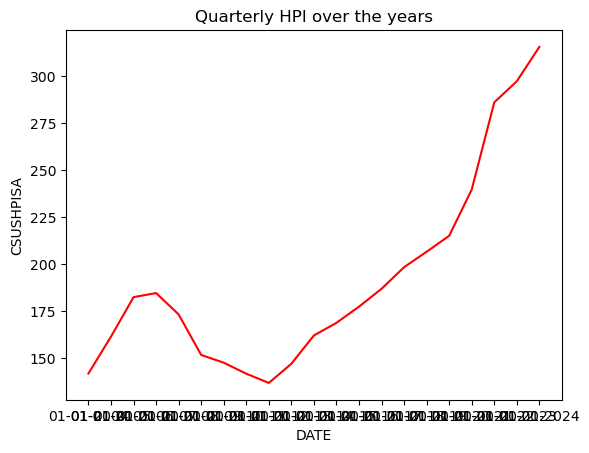

In [258]:

sns.lineplot(data=HPI,x='DATE',y='CSUSHPISA',color='red').set(title='Quarterly HPI over the years')



Plotting the trend of different key factors over the 20 years

[Text(0.5, 1.0, 'Quarterly Unemplyment rate over the years')]

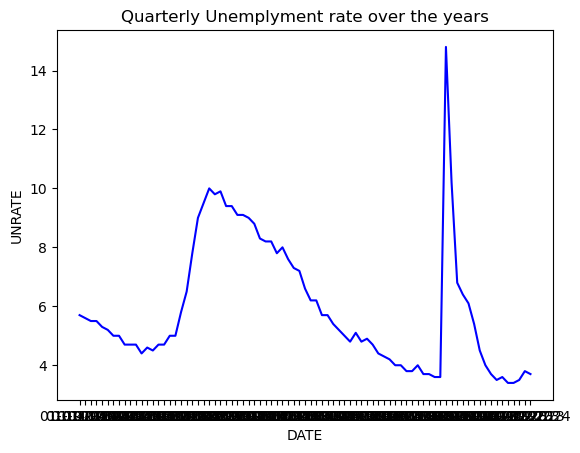

In [259]:

sns.lineplot(data=unemployment_rate,x='DATE',y='UNRATE',color='blue').set(title='Quarterly Unemplyment rate over the years')

[Text(0.5, 1.0, 'Quarterly supply rate over the years')]

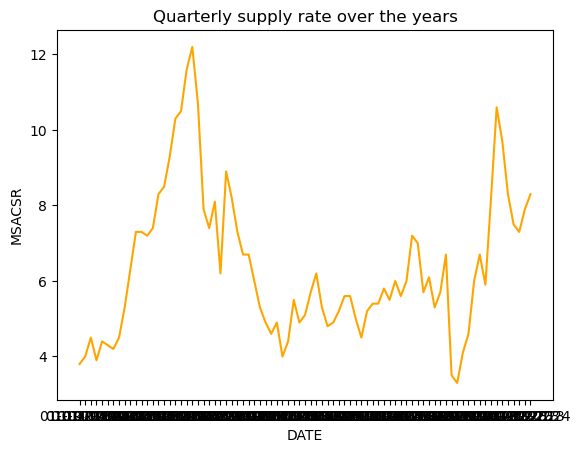

In [260]:

sns.lineplot(data=housing_supply,x='DATE',y='MSACSR',color='orange').set(title='Quarterly supply rate over the years')

[Text(0.5, 1.0, 'Quarterly consumer sentiment over the years')]

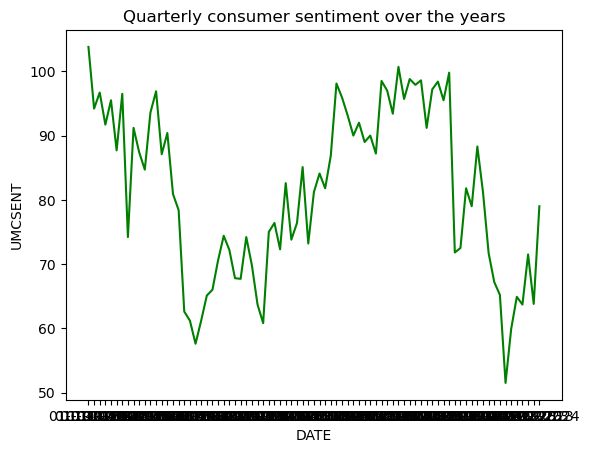

In [261]:

sns.lineplot(data=consumer_sentiment,x='DATE',y='UMCSENT',color='green').set(title='Quarterly consumer sentiment over the years')

[Text(0.5, 1.0, 'Quarterly population growth over the years')]

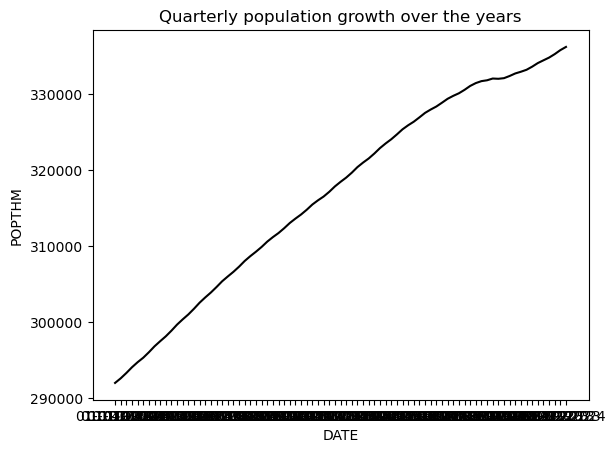

In [262]:

sns.lineplot(data=population_growth,x='DATE',y='POPTHM',color='black').set(title='Quarterly population growth over the years')

[Text(0.5, 1.0, 'Quarterly GDP growth over the years')]

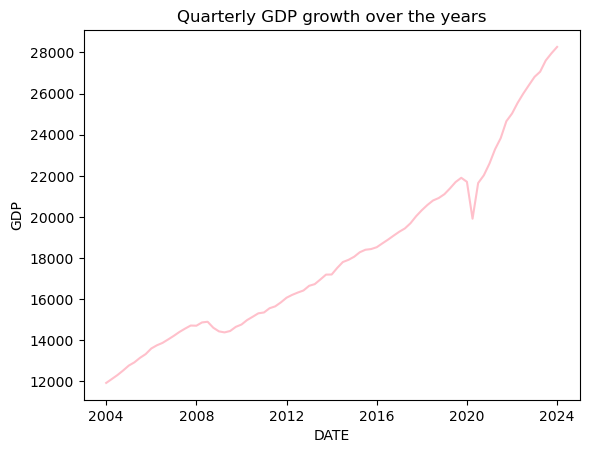

In [263]:

sns.lineplot(data=GDP,x='DATE',y='GDP',color='pink').set(title='Quarterly GDP growth over the years')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, '01-01-2004'),
  Text(1, 0, '01-01-2005'),
  Text(2, 0, '01-01-2006'),
  Text(3, 0, '01-01-2007'),
  Text(4, 0, '01-01-2008'),
  Text(5, 0, '01-01-2009'),
  Text(6, 0, '01-01-2010'),
  Text(7, 0, '01-01-2011'),
  Text(8, 0, '01-01-2012'),
  Text(9, 0, '01-01-2013'),
  Text(10, 0, '01-01-2014'),
  Text(11, 0, '01-01-2015'),
  Text(12, 0, '01-01-2016'),
  Text(13, 0, '01-01-2017'),
  Text(14, 0, '01-01-2018'),
  Text(15, 0, '01-01-2019'),
  Text(16, 0, '01-01-2020'),
  Text(17, 0, '01-01-2021'),
  Text(18, 0, '01-01-2022'),
  Text(19, 0, '01-01-2023'),
  Text(20, 0, '01-01-2024')])

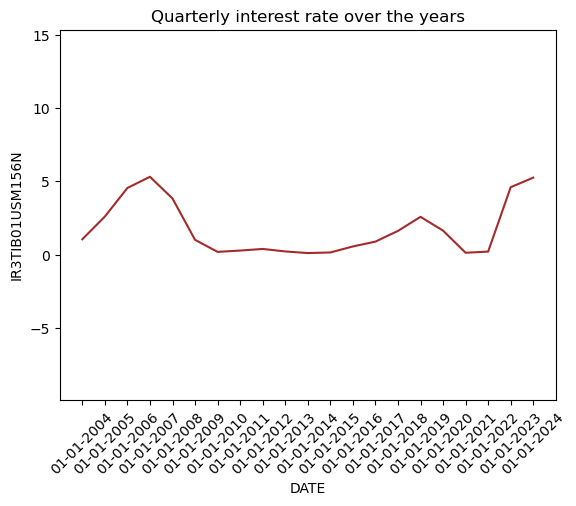

In [264]:

from matplotlib.ticker import AutoLocator
# Convert the 'numeric_column' to numeric type
interest['IR3TIB01USM156N'] = pd.to_numeric(interest['IR3TIB01USM156N'])

sns.lineplot(data=interest,x='DATE',y='IR3TIB01USM156N',color='brown').set(title='Quarterly interest rate over the years')
plt.ylim(interest['IR3TIB01USM156N'].min() - 10, interest['IR3TIB01USM156N'].max() + 10)
plt.xticks(rotation=45)

[Text(0.5, 1.0, 'Quarterly permit over the years')]

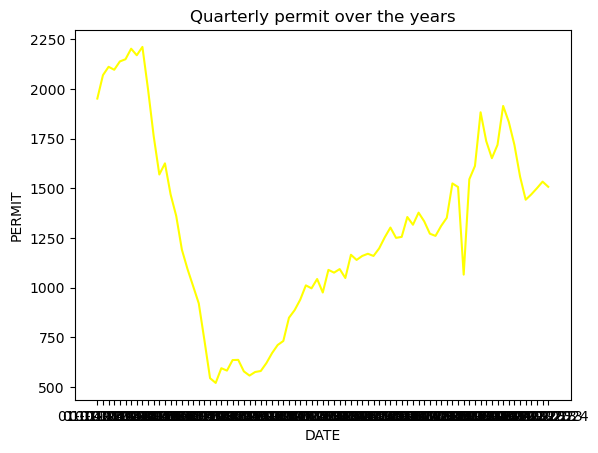

In [265]:
sns.lineplot(data=permit,x='DATE',y='PERMIT',color='yellow').set(title='Quarterly permit over the years')


[Text(0.5, 1.0, 'Quarterly median salary over the years')]

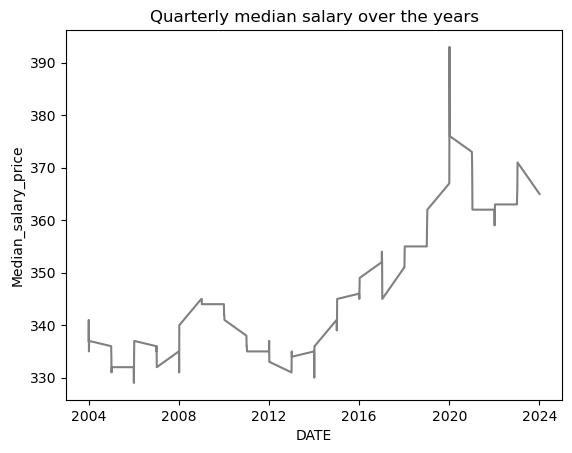

In [266]:
sns.lineplot(data=MSP,x='DATE',y='Median_salary_price',color='grey').set(title='Quarterly median salary over the years')


Merging all factors dataframe into one dataframe for further analysis

In [267]:

def concat_on_date(dfs):
    for i in range(len(dfs)):
        dfs[i]['DATE'] = pd.to_datetime(dfs[i]['DATE'])
        dfs[i] = dfs[i].set_index('DATE')
    
    concatenated_df = pd.concat(dfs, axis=1, join='inner')
    
    concatenated_df.reset_index(inplace=True)
    
    return concatenated_df

Merging...

In [268]:
dfs = [population_growth,consumer_sentiment,housing_supply,unemployment_rate,HPI,permit,interest,MSP]
merged_df = concat_on_date(dfs)
print(merged_df.head())

        DATE    POPTHM  UMCSENT  MSACSR  UNRATE  CSUSHPISA  PERMIT  \
0 2004-01-01  292046.0    103.8     3.8     5.7    141.647  1952.0   
1 2005-01-01  294768.0     95.5     4.4     5.3    161.289  2139.0   
2 2006-01-01  297526.0     91.2     5.3     4.7    182.320  2212.0   
3 2007-01-01  300398.0     96.9     7.2     4.6    184.516  1626.0   
4 2008-01-01  303280.0     78.4     9.3     5.0    173.131  1094.0   

   IR3TIB01USM156N  Median_salary_price  
0             1.06                  337  
1             2.61                  336  
2             4.56                  332  
3             5.32                  336  
4             3.84                  335  


Changing column names

In [269]:
merged_df.rename(columns={'CSUSHPISA':'Home_price_index','MSACSR':'Monthly_supply','UMCSENT':'Consumer_sentiment','POPTHM':'population_growth','UNRATE':'unemployment_rate','IR3TIB01USM156N':'interest','DATE':'Date'},inplace = True)

In [270]:
merged_df.head()

,Date,population_growth,Consumer_sentiment,Monthly_supply,unemployment_rate,Home_price_index,PERMIT,interest,Median_salary_price
0,2004-01-01,292046.0,103.8,3.8,5.7,141.647,1952.0,1.06,337
1,2005-01-01,294768.0,95.5,4.4,5.3,161.289,2139.0,2.61,336
2,2006-01-01,297526.0,91.2,5.3,4.7,182.320,2212.0,4.56,332
3,2007-01-01,300398.0,96.9,7.2,4.6,184.516,1626.0,5.32,336
4,2008-01-01,303280.0,78.4,9.3,5.0,173.131,1094.0,3.84,335


To closely analyse how much key factors are affecting the HPI plotting the heatmap

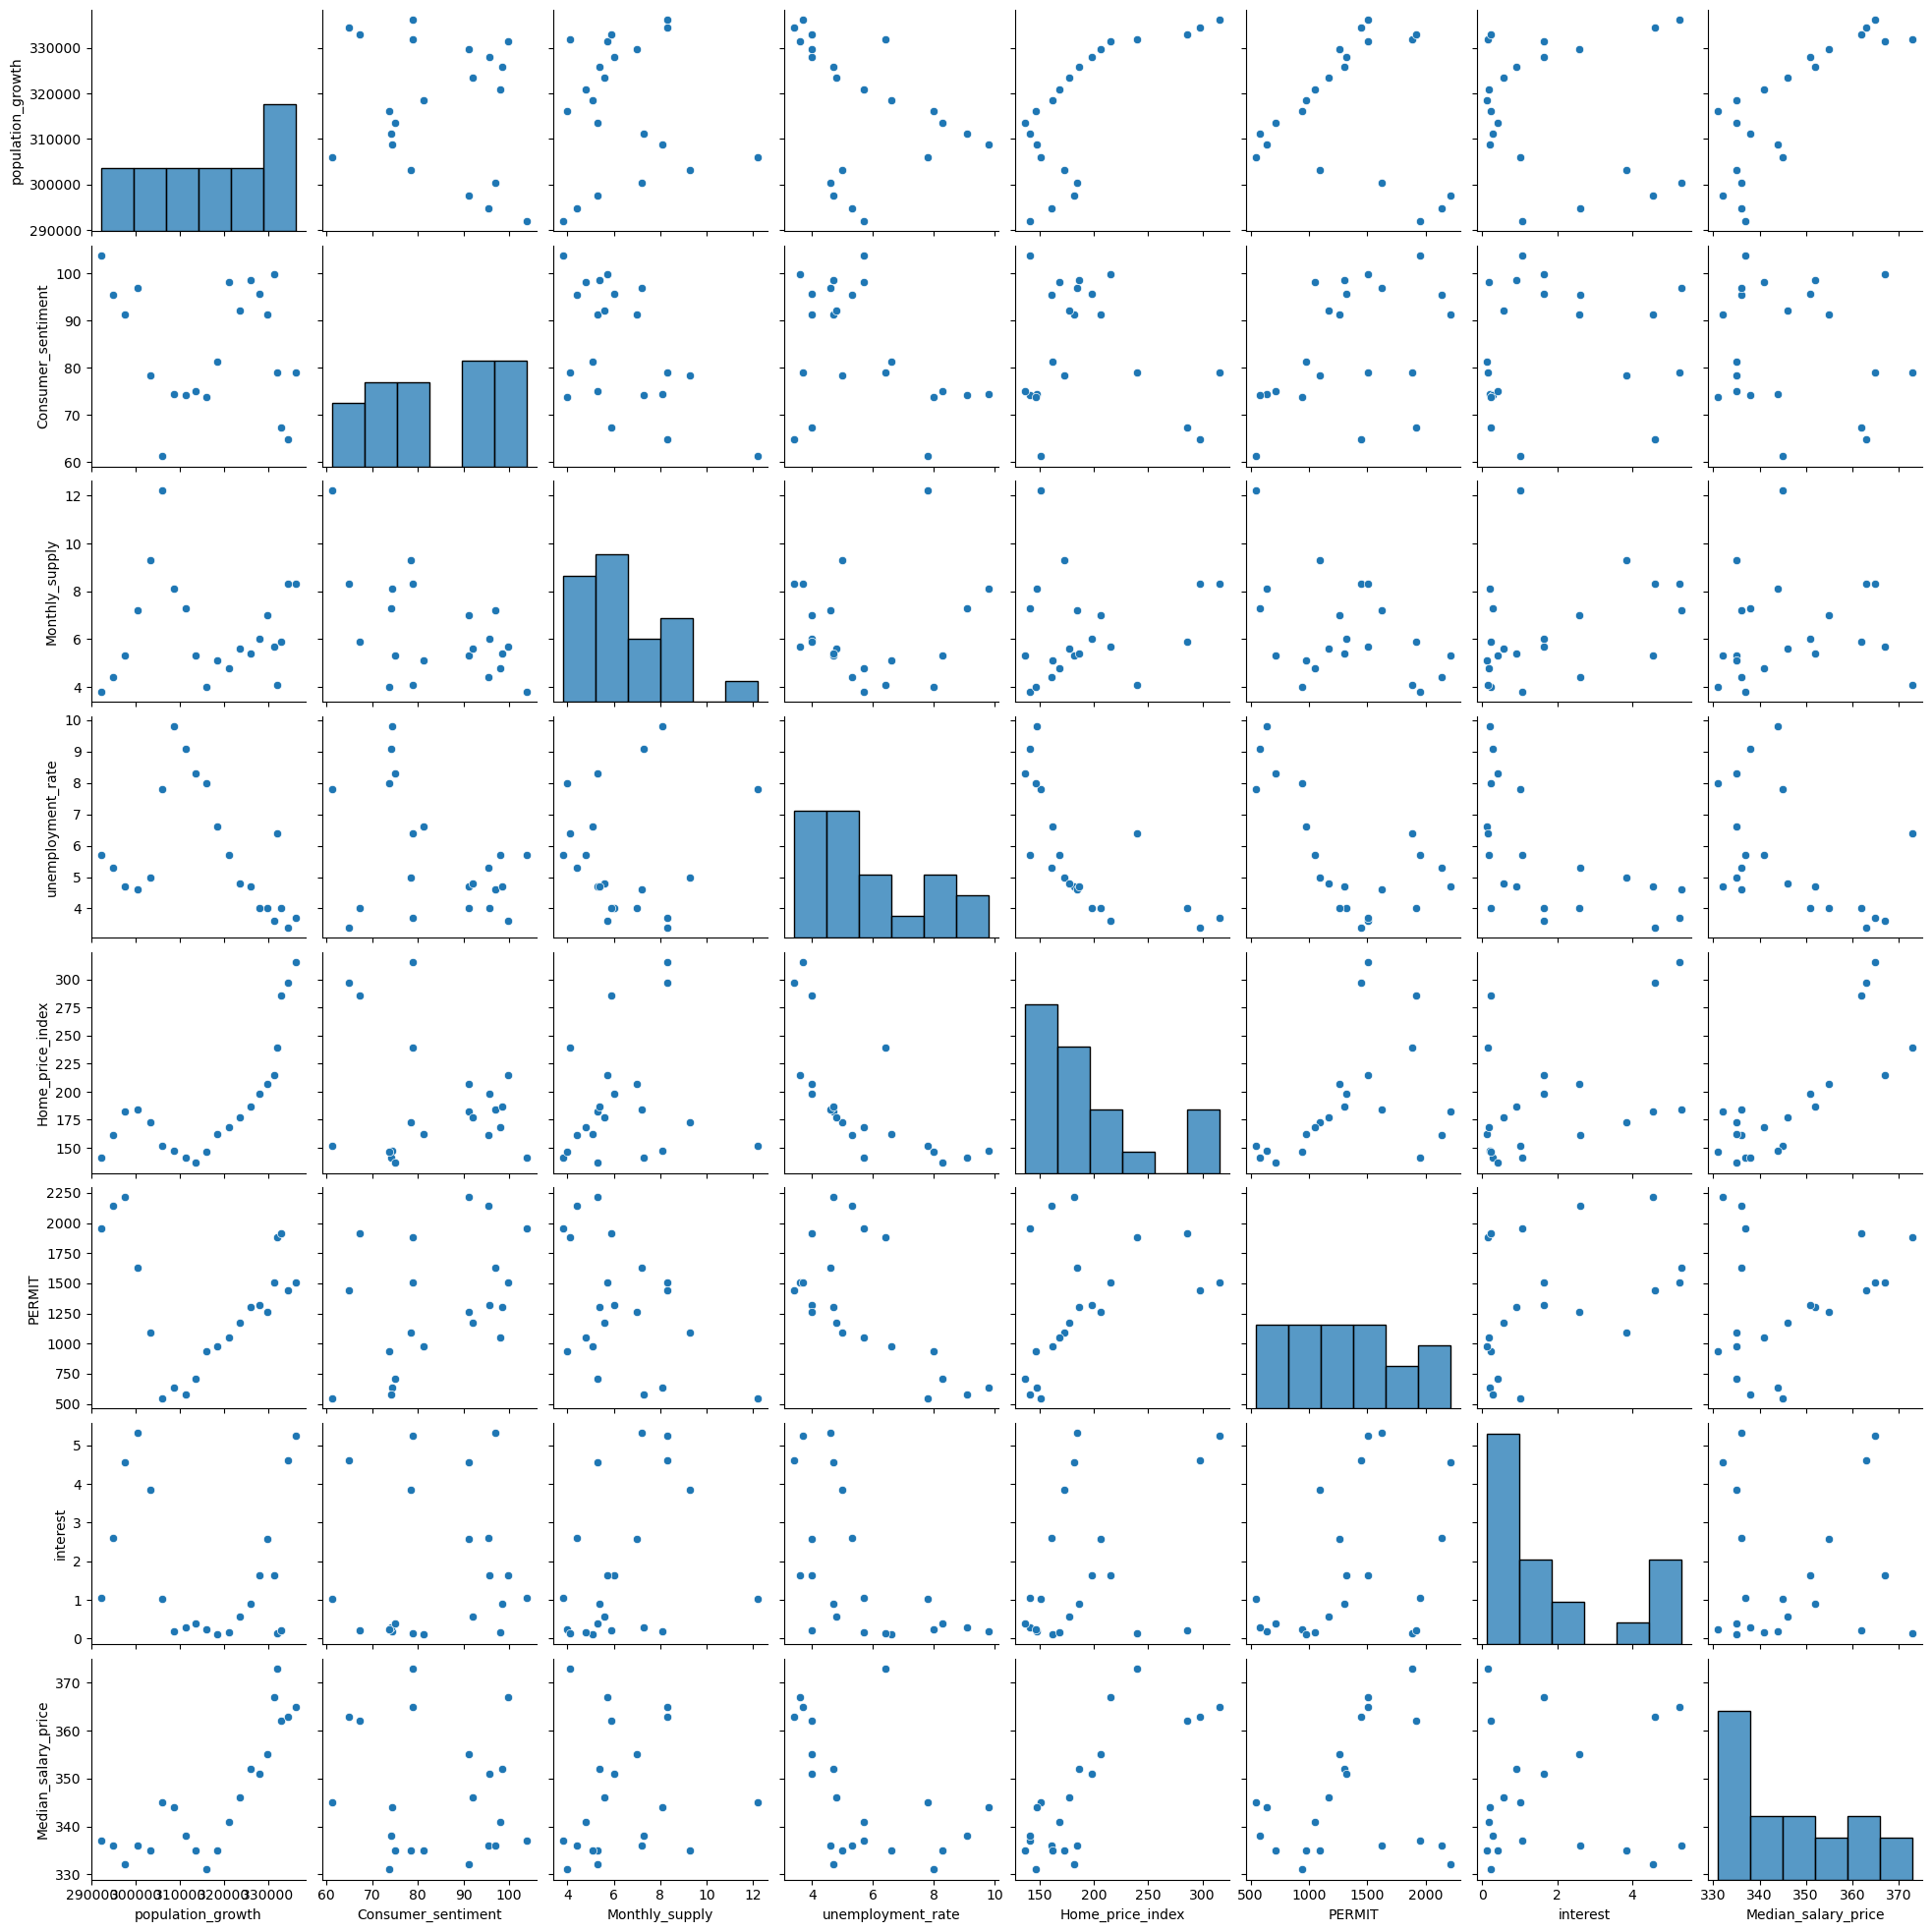

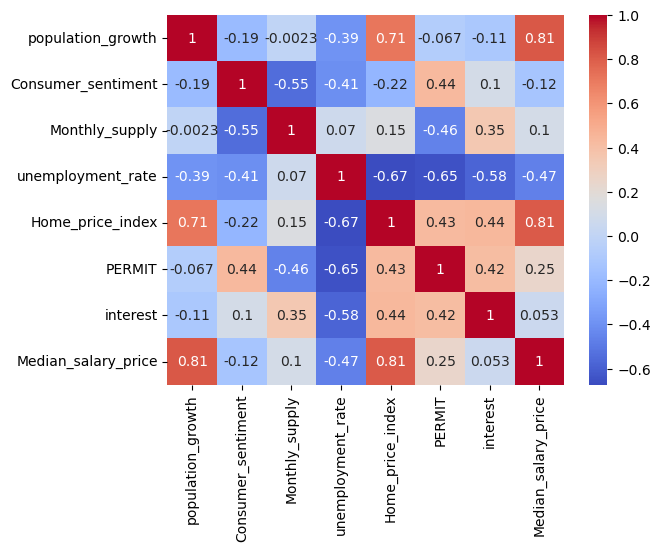

In [271]:


corr_df = merged_df.drop('Date',axis=1)

sns.pairplot(corr_df)
plt.show()

corr_matrix = corr_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


We got to know here from the heatmap that MSP, Unemployment rate and population growths are most import key factors affecting the HPI

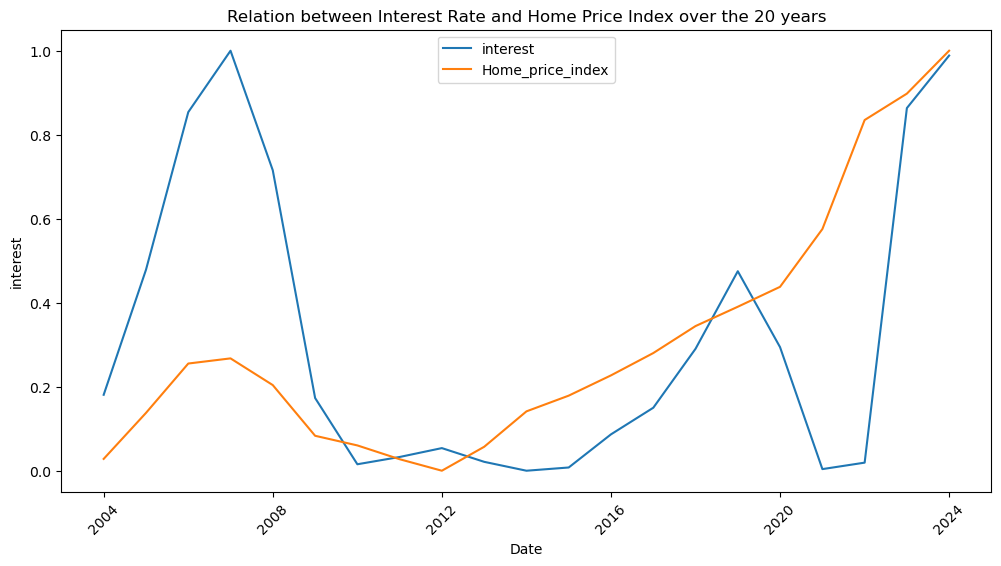

In [272]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
merged_df[['interest', 'Home_price_index']] = scaler.fit_transform(merged_df[['interest', 'Home_price_index']])

normalizer = MinMaxScaler()
merged_df[['interest', 'Home_price_index']] = normalizer.fit_transform(merged_df[['interest', 'Home_price_index']])

plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_df, x='Date', y='interest', label='interest')
sns.lineplot(data=merged_df, x='Date', y='Home_price_index', label='Home_price_index')

plt.xticks(rotation=45)

plt.legend()
plt.title('Relation between Interest Rate and Home Price Index over the 20 years')
plt.show()


Plotting the trends of key factors along with HPI to visualize how key factors are affecting the trend

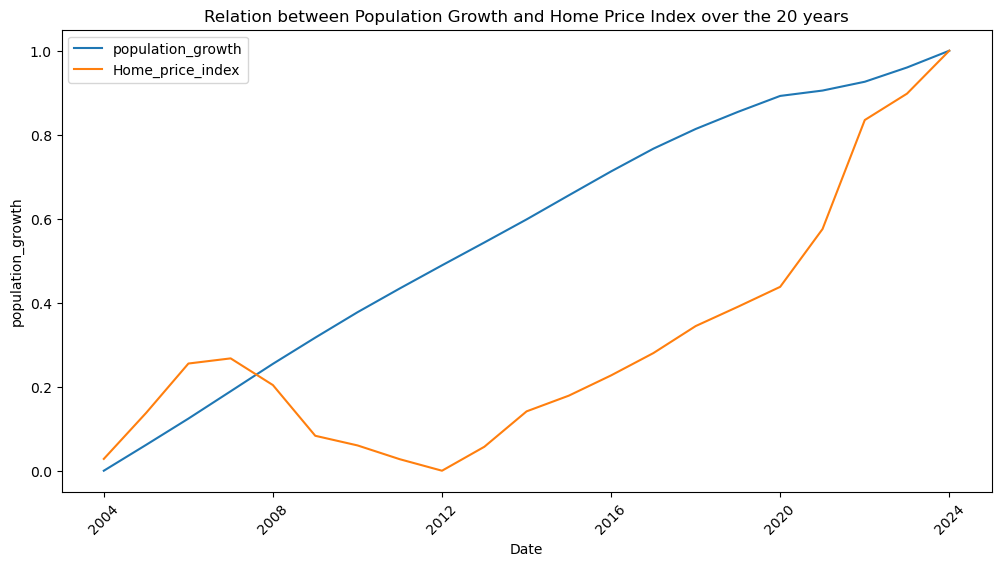

In [273]:

scaler = StandardScaler()
merged_df[['population_growth', 'Home_price_index']] = scaler.fit_transform(merged_df[['population_growth', 'Home_price_index']])

normalizer = MinMaxScaler()
merged_df[['population_growth', 'Home_price_index']] = normalizer.fit_transform(merged_df[['population_growth', 'Home_price_index']])

plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_df, x='Date', y='population_growth', label='population_growth')
sns.lineplot(data=merged_df, x='Date', y='Home_price_index', label='Home_price_index')

plt.xticks(rotation=45)

plt.legend()
plt.title('Relation between Population Growth and Home Price Index over the 20 years')

plt.show()


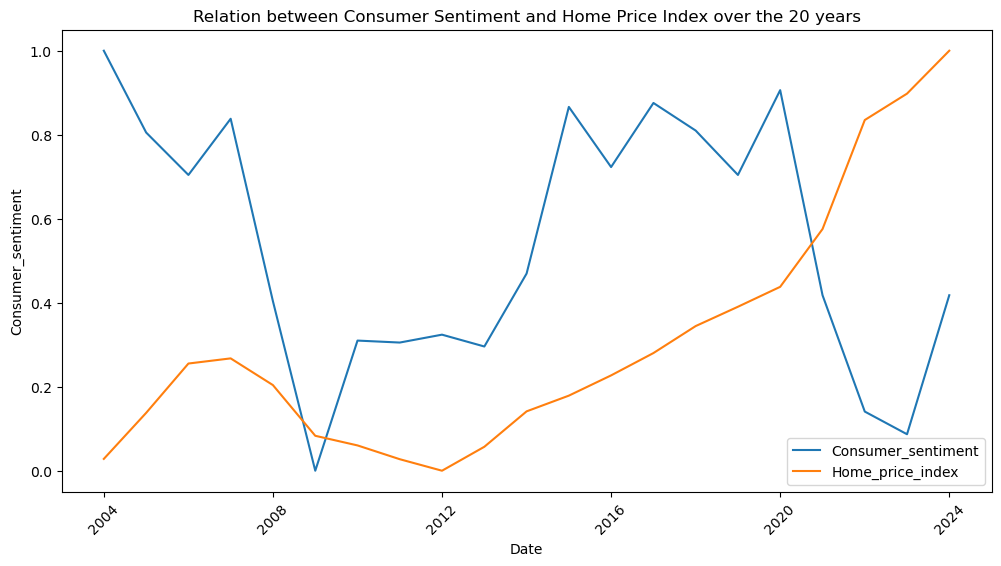

In [274]:

scaler = StandardScaler()
merged_df[['Consumer_sentiment', 'Home_price_index']] = scaler.fit_transform(merged_df[['Consumer_sentiment', 'Home_price_index']])

normalizer = MinMaxScaler()
merged_df[['Consumer_sentiment', 'Home_price_index']] = normalizer.fit_transform(merged_df[['Consumer_sentiment', 'Home_price_index']])

plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_df, x='Date', y='Consumer_sentiment', label='Consumer_sentiment')
sns.lineplot(data=merged_df, x='Date', y='Home_price_index', label='Home_price_index')

plt.xticks(rotation=45)

plt.legend()
plt.title('Relation between Consumer Sentiment and Home Price Index over the 20 years')
plt.show()


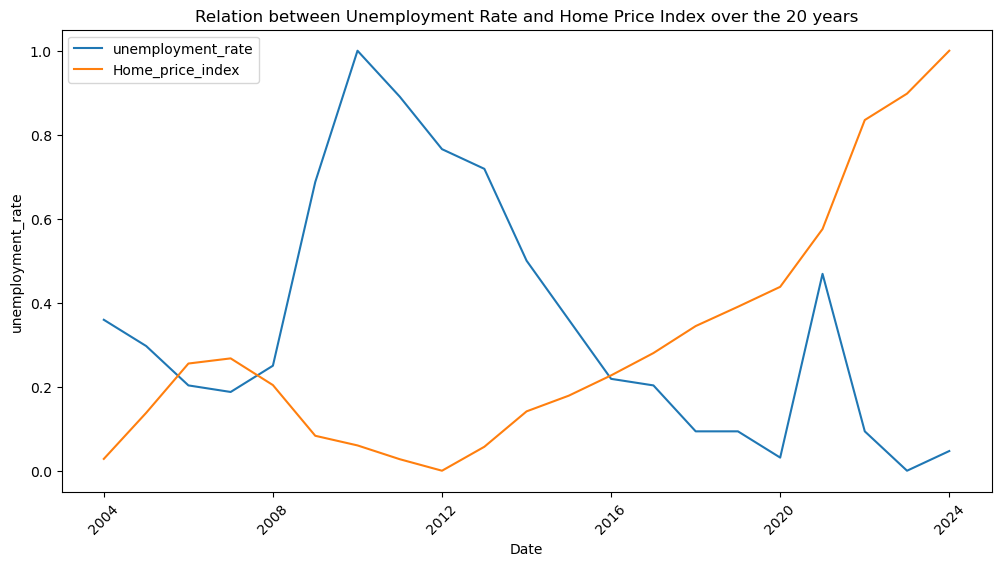

In [275]:

scaler = StandardScaler()
merged_df[['unemployment_rate', 'Home_price_index']] = scaler.fit_transform(merged_df[['unemployment_rate', 'Home_price_index']])

normalizer = MinMaxScaler()
merged_df[['unemployment_rate', 'Home_price_index']] = normalizer.fit_transform(merged_df[['unemployment_rate', 'Home_price_index']])

plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_df, x='Date', y='unemployment_rate', label='unemployment_rate')
sns.lineplot(data=merged_df, x='Date', y='Home_price_index', label='Home_price_index')

plt.xticks(rotation=45)
plt.legend()
plt.title('Relation between Unemployment Rate and Home Price Index over the 20 years')
plt.show()


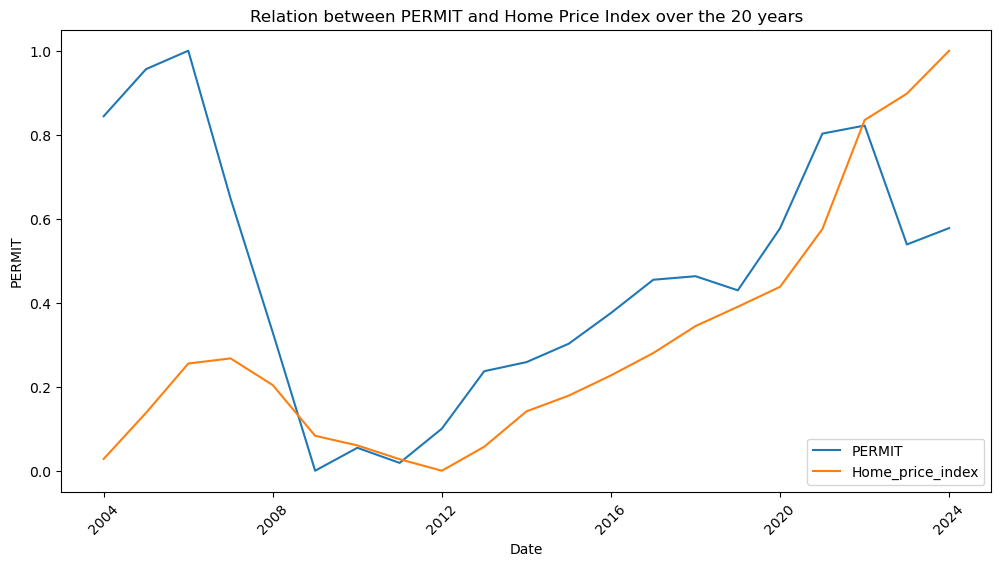

In [276]:

scaler = StandardScaler()
merged_df[['PERMIT', 'Home_price_index']] = scaler.fit_transform(merged_df[['PERMIT', 'Home_price_index']])

normalizer = MinMaxScaler()
merged_df[['PERMIT', 'Home_price_index']] = normalizer.fit_transform(merged_df[['PERMIT', 'Home_price_index']])

plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_df, x='Date', y='PERMIT', label='PERMIT')
sns.lineplot(data=merged_df, x='Date', y='Home_price_index', label='Home_price_index')

plt.xticks(rotation=45)

plt.legend()
plt.title('Relation between PERMIT and Home Price Index over the 20 years')
plt.show()


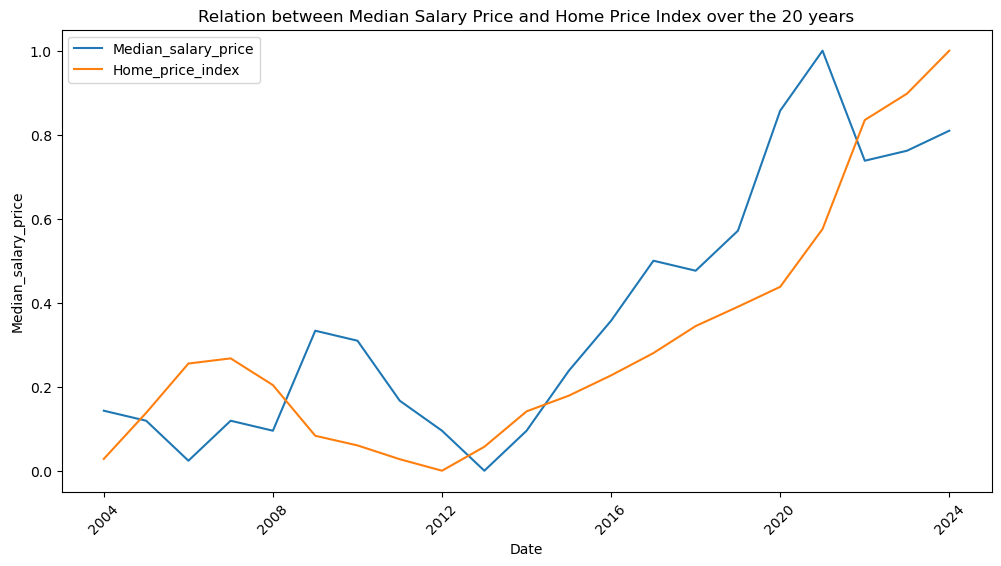

In [277]:

scaler = StandardScaler()
merged_df[['Median_salary_price', 'Home_price_index']] = scaler.fit_transform(merged_df[['Median_salary_price', 'Home_price_index']])

normalizer = MinMaxScaler()
merged_df[['Median_salary_price', 'Home_price_index']] = normalizer.fit_transform(merged_df[['Median_salary_price', 'Home_price_index']])

plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_df, x='Date', y='Median_salary_price', label='Median_salary_price')
sns.lineplot(data=merged_df, x='Date', y='Home_price_index', label='Home_price_index')

plt.xticks(rotation=45)
plt.legend()
plt.title('Relation between Median Salary Price and Home Price Index over the 20 years')
plt.show()


Finally making different models on our data to see which data performs best on the basis of r2 score

Model: RandomForestRegressor
R² Score: 0.6204
RMSE: 0.1370

Model: KNeighborsRegressor
R² Score: 0.6266
RMSE: 0.1358

Model: Ridge
R² Score: 0.9161
RMSE: 0.0644

Model: GradientBoostingRegressor
R² Score: 0.4491
RMSE: 0.1650

Model: LinearRegression
R² Score: 0.6285
RMSE: 0.1355



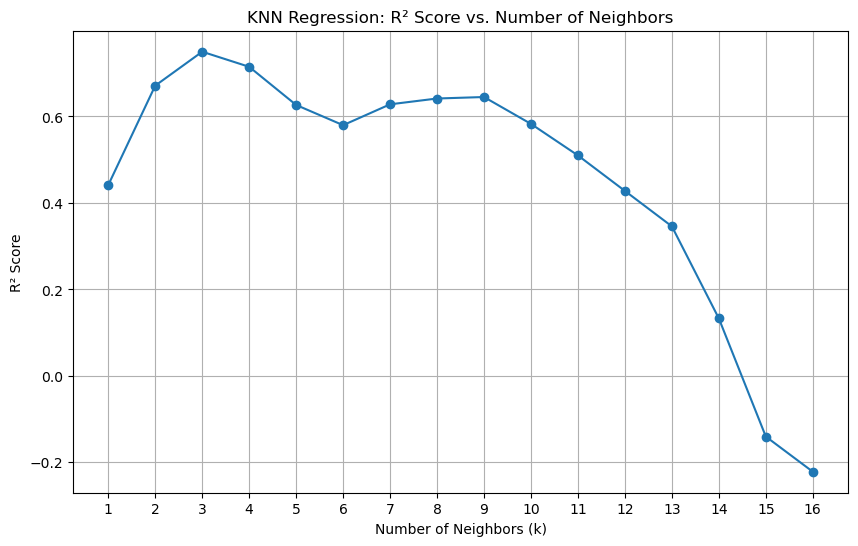

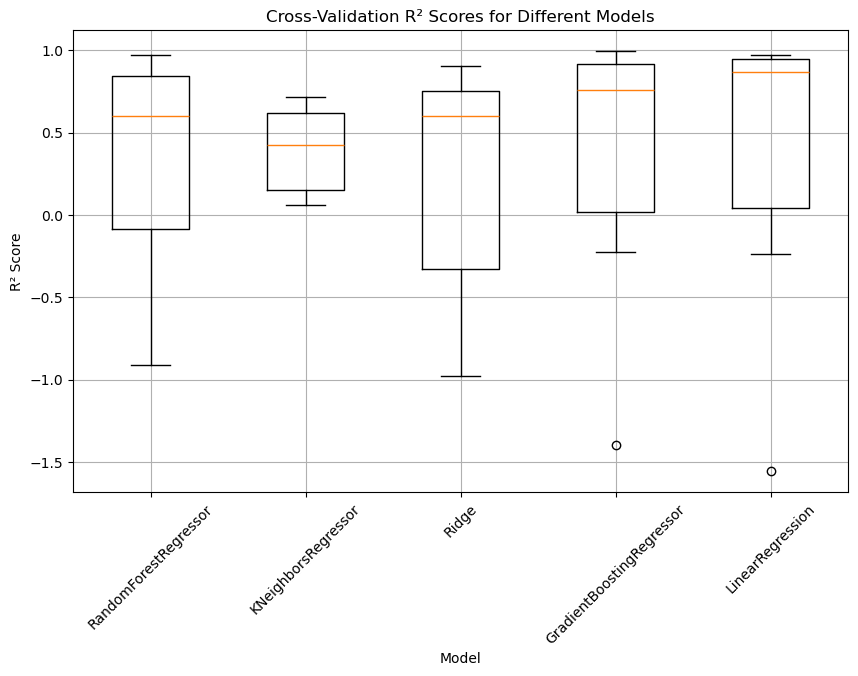

In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor


df = merged_df.drop('Date', axis=1)
X = df.drop('Home_price_index', axis=1)
y = df['Home_price_index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


models = {
    'RandomForestRegressor': RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'Ridge': Ridge(alpha=10),
    'GradientBoostingRegressor': GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42),
    'LinearRegression': LinearRegression()
}


def evaluate_models(models, X_train, y_train, X_test, y_test):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results[name] = {
            'R² Score': r2_score(y_test, y_pred),
            'RMSE': np.sqrt(mean_squared_error(y_test, y_pred))
        }
    return results

results = evaluate_models(models, X_train_scaled, y_train, X_test_scaled, y_test)


for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"R² Score: {metrics['R² Score']:.4f}")
    print(f"RMSE: {metrics['RMSE']:.4f}\n")


k_range = range(1, 17)
knn_scores = []

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    knn_pred = knn.predict(X_test_scaled)
    knn_scores.append(r2_score(y_test, knn_pred))

plt.figure(figsize=(10, 6))
plt.plot(k_range, knn_scores, marker='o')
plt.title('KNN Regression: R² Score vs. Number of Neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('R² Score')
plt.grid(True)
plt.xticks(k_range)
plt.show()


kf = KFold(n_splits=6, random_state=42, shuffle=True)
cv_results = []

for name, model in models.items():
    cv_result = cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring='r2')
    cv_results.append(cv_result)

plt.figure(figsize=(10, 6))
plt.boxplot(cv_results, labels=models.keys())
plt.title('Cross-Validation R² Scores for Different Models')
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Ridge performs the best while KNN, Random Forest Regressor and Linear Regression models performance is also decent. We got lowest score in Gradient Boosting Regressor.